## Imports

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import seaborn.objects as so;
import Units
sns.set_theme()

Reformatting test.txt as separate files. Not always needed, were designed this way for comparison to C++ output files.

In [2]:
data = np.loadtxt("test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]
AVIndex=datanew[:,0:2]
MomProb=datanew[:,4:] #may depend on file, please check
np.savetxt("AVIndex.txt",AVIndex)
np.savetxt("MomProb.txt",MomProb)

FileNotFoundError: test.txt not found.

Data imports

In [44]:
filepath = "../Data/Rust_Runs/Option2_FinerFit_98CFI/";

data = np.loadtxt(filepath + "test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]

AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])

#AList = np.loadtxt("./Data/2param_acc_Option2/Acceleration.txt");
#VList = np.loadtxt("./Data/2param_acc_Option2/LatticeDepth.txt");

AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);
MomProb = np.loadtxt(filepath +  "MomProb.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

/tmp/ipykernel_55955/2638654973.py:12: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);


In [11]:
print(AList[50], VList[25])
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
print(datamom[50,25,:])


0.0 10.0
[7.79475651e-04 1.07683464e-02 7.46451016e-03 4.35311148e-01
 1.19488382e-01 2.64746489e-02 5.98152566e-02 3.08016659e-01
 2.30293604e-04 3.02351607e-02 1.41611874e-03]


## Units

This cell is made redundant through import of Unit.py. For future coding efforts, better to use Unit.py/

In [4]:
#Lambda = 852*10**(-9);
Lambda = 1064*10**(-9);
k_L = 2*np.pi / Lambda;
hbar = 1.054571817*10**(-34);
atomicmass = 86.90918;
massDalton = 1.660539*10**(-27);
mass = atomicmass * massDalton;
E_R = (hbar * k_L)**2 /(2*mass);
g=9.81;
accUnit= 2*(E_R)**2/(hbar**2*k_L);

In [ ]:
codeacc = 0.025;
realacc = codeacc*accUnit

In [5]:
realacc = 0.125*9.81;
codeacc = realacc/accUnit
print(codeacc)

0.022303418727171242


## Plotting Momentum Fringes in $(a,V_0)$

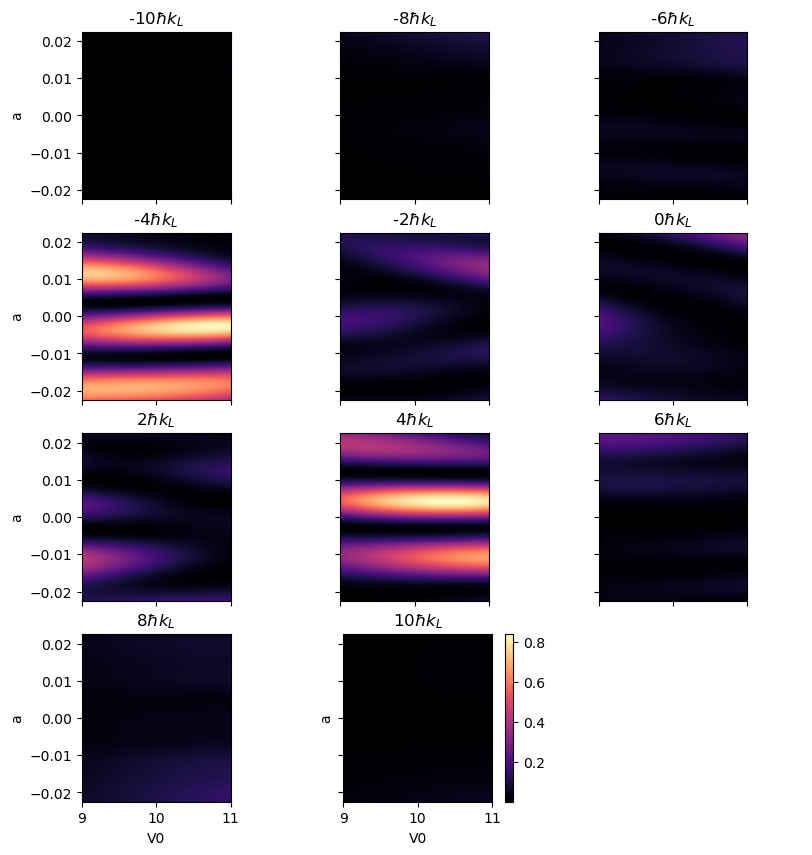

In [11]:
fig=plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 3, hspace=0.2, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[-1,-1].axis("off");

minn = np.min(MomProb);
maxx = np.max(MomProb);
for i in range(11):
    ax = axs[i//3, i% 3];
    im=ax.imshow(np.reshape(MomProb[:,i], (AList.size,VList.size)), cmap="magma",extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=50, vmin=minn, vmax = maxx, label=str(2*i-10)+"$\hbar k_L$")


    ax.set_title(str(-10+2*i)+"$\hbar k_L$")
    ax.set_xlabel("V0")
    ax.set_ylabel("a")

fig.colorbar(im,  orientation='vertical')


for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
fig=plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 3, hspace=0.2, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[-1,-1].axis("off");

minn = np.min(MomProb2);
maxx = np.max(MomProb2);
for i in range(11):
    ax = axs[i//3, i% 3];
    im=ax.imshow(np.reshape(MomProb2[:,i], (AList.size,VList.size)), cmap="magma",extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=50, vmin=minn, vmax = maxx, label=str(2*i-10)+"$\hbar k_L$")


    ax.set_title(str(-10+2*i)+"$\hbar k_L$")
    ax.set_xlabel("V0")
    ax.set_ylabel("a")

fig.colorbar(im,  orientation='vertical')


for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
plt.imshow(datamom[:,25,:].transpose(), cmap='gray', extent=(AList[0],AList[-1], 10,-10), aspect=1/10000)
plt.xlabel("acc")
plt.ylabel("$n\hbar k_L$")

In [ ]:
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
plt.imshow(datamom[25,:,:].transpose(), cmap='gray', extent=(VList[0],VList[-1], 10,-10), aspect=1/20)
plt.xlabel("V0")
plt.ylabel("$n\hbar k_L$")

## Jenson-Shannon Divergence

### Defining Divergence Functions

In [7]:
def KLDivergence( P, Q):
    if len(P) != len(Q):
        return None;
    sum =0;

    for i in range(len(P)):
        sum = np.dot(P, np.log2( np.divide(P, Q)));

    return sum;


In [8]:
def JSDivergence( P, Q):
    M = (P+Q)/2;
    JS = 0.5 * ( KLDivergence(P,M) + KLDivergence(Q, M));
    return JS;


### $JSD(a,a')$ plots and extracting $I_{aa}$

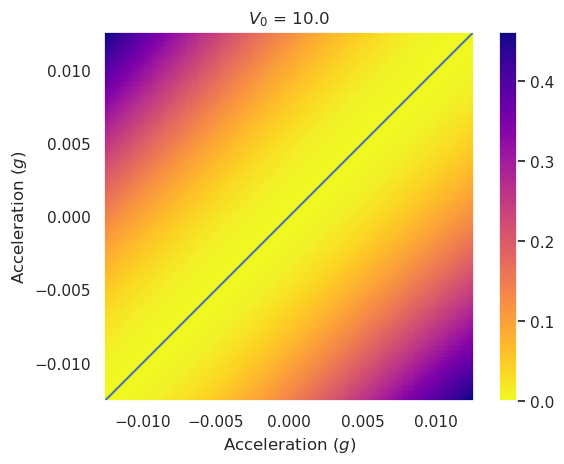

In [46]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]*accUnit/g, AList[indices_JS[0]]*accUnit/g)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_0$ = "+str(VList[25]))
plt.grid(False)
#plt.savefig("JS_acc.png")

In [ ]:
plt.imshow(JSDivergenceMatrix, cmap="plasma_r")
plt.colorbar()

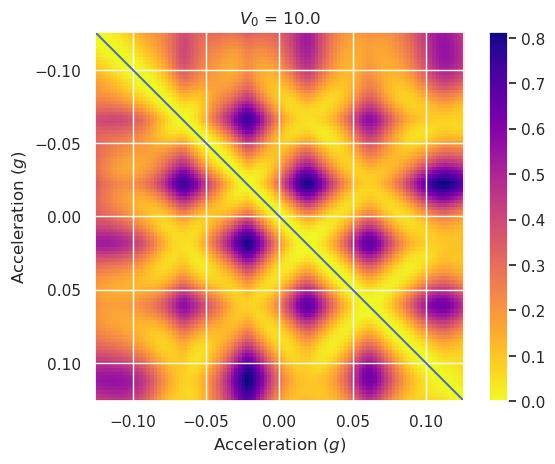

In [21]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]*accUnit/g,AList[indices_JS[0]]*accUnit/g)
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_0$ = "+str(VList[25]))
plt.savefig("JS_acc.png")

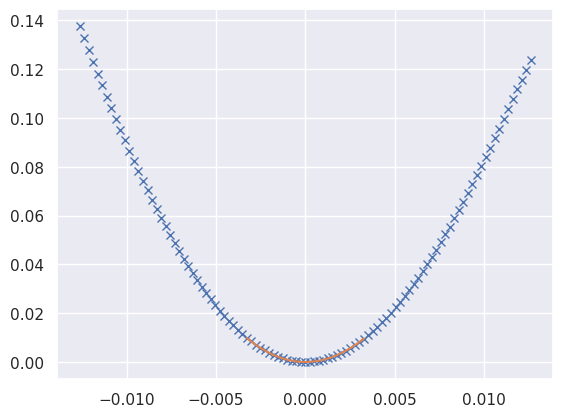

In [65]:
JSD_a = JSDivergenceMatrix[50,:];
plt.plot(AList*accUnit/g, JSD_a, 'x',label="");
plt.grid(True, which="both")
indices = JSD_a<=0.01
#restrictedJSD = JSDivergenceMatrix[50,:][JSDivergenceMatrix[50,:]<0.05]

#plt.plot(AList[30:70]*accUnit/g, JSD_a[30:70])
plt.plot(AList[indices]*accUnit/g, JSD_a[indices] )

In [49]:
AList[indices]*accUnit/g

array([-0.00453966, -0.00428746, -0.00403526, -0.00378305, -0.00353085,
       -0.00327865, -0.00302644, -0.00277424, -0.00252203, -0.00226983,
       -0.00201763, -0.00176542, -0.00151322, -0.00126102, -0.00100881,
       -0.00075661, -0.00050441, -0.0002522 ,  0.        ,  0.0002522 ,
        0.00050441,  0.00075661,  0.00100881,  0.00126102,  0.00151322,
        0.00176542,  0.00201763,  0.00226983,  0.00252203,  0.00277424,
        0.00302644,  0.00327865,  0.00353085,  0.00378305,  0.00403526,
        0.00428746,  0.00453966])

Positive and symmetric curvature implies Fisher information 

In [50]:
p = np.polyfit(AList[30:70], JSDivergenceMatrix[50,30:70],deg=2);
print(p)

[ 2.83116034e+04 -3.24465462e-01  2.30349946e-05]


In [51]:
print(p[0]*8*np.log(2))

156992.86479935446


In code units, $F^{MZ}_{aa} = (2nT^2)^2/4 $

In [52]:
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (2*n_p *T**2)**2/4
print(p[0]*8*np.log(2)/F_MZ)
print(p[0]*8*np.log(2)/F_MZ *1/1.701)

8.741823036075946
1.680164828492425
0.9877512219238243


In [3]:
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (2*n_p *T**2)**2/4
print(1.23/F_MZ)

8.741823036075946
1.3163673022254324e-05


the above is our CFI value from fit

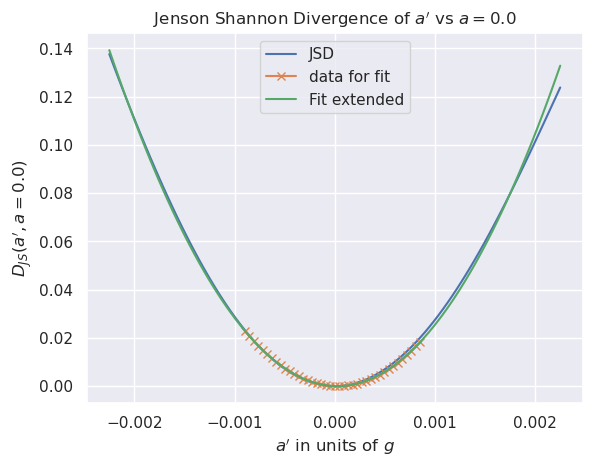

In [70]:
plt.plot(AList, JSDivergenceMatrix[50,:], label="JSD");
data = p[0]*AList[30:70]**2+p[1]*AList[30:70]
plt.grid(True, which="both")
plt.plot(AList[30:70], data, 'x-',label="data for fit")

extendeddata = p[0]*AList**2+p[1]*AList
plt.plot(AList, extendeddata,label="Fit extended")
plt.xlabel("$a'$ in units of $g$");
plt.ylabel("$D_{JS}(a',a=0.0)$")
plt.legend()
plt.title("Jenson Shannon Divergence of $a'$ vs $a=0.0$")
plt.savefig("finerfit_Fitgrpah.pdf")

8.741823036075946
1.5950543178176049
0.9377156483348646


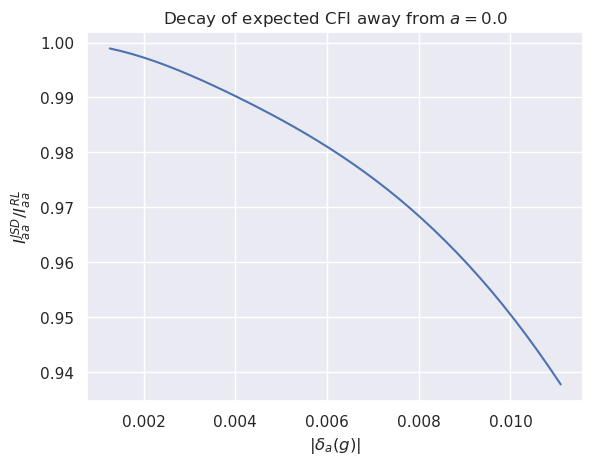

In [71]:
pval=[];
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (2*n_p *T**2)**2/4
print(p[0]*8*np.log(2)/F_MZ)
print(p[0]*8*np.log(2)/F_MZ *1/1.701)
maxval=[];
Aval=[];
for max in range(5,45,1):
    p = np.polyfit(AList[50-max:50+max+1], JSDivergenceMatrix[50,50-max:50+max+1],deg=2);
    maxval.append(max);
    Aval.append(AList[50+max])
    pval.append(p[0]*8*np.log(2)/F_MZ *1/1.701);

plt.plot(np.array(Aval)*accUnit/g, pval)
plt.xlabel("$|\delta_a(g)|$")
plt.ylabel("$I^{JSD}_{aa}/I^{RL}_{aa}$")
plt.title("Decay of expected CFI away from $a=0.0$")
plt.savefig("DecayofCFIfit.pdf")

8.741823036075946
1.5950543178176049
0.9377156483348646


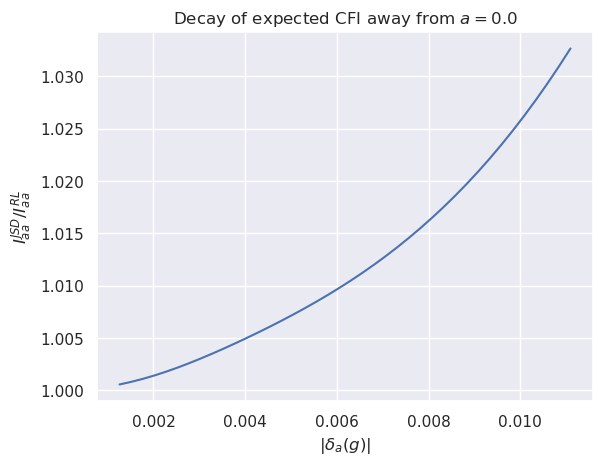

In [72]:
pval=[];
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (2*n_p *T**2)**2/4
print(p[0]*8*np.log(2)/F_MZ)
print(p[0]*8*np.log(2)/F_MZ *1/1.701)
maxval=[];
Aval=[];
for max in range(5,45,1):
    p = np.polyfit(AList[50-max:50+max+1], JSDivergenceMatrix[50,50-max:50+max+1],deg=2);
    maxval.append(max);
    Aval.append(AList[50+max])
    pval.append(p[0]*8*np.log(2)/F_MZ *1/1.701);

plt.plot(np.array(Aval)*accUnit/g, 1/np.sqrt(pval))
plt.xlabel("$|\delta_a(g)|$")
plt.ylabel("$I^{JSD}_{aa}/I^{RL}_{aa}$")
plt.title("Decay of expected CFI away from $a=0.0$")
plt.savefig("Decayofsensitivityfit.pdf")

In [ ]:
#fftmatrix = fft.fft(np.concatenate( (JSDivergenceMatrix[50,50:], np.flip(JSDivergenceMatrix[50,50:]) )) );
fftmatrix = fft.fft( JSDivergenceMatrix[50,50:75]  );
plt.plot(abs(fftmatrix), 'x-')
plt.title("Fourier Transform of JSD")
plt.ylabel("Norm of coefficients")
plt.xlabel("Discrete fourier frequencies");
plt.grid(True, which="both")

### $JSD(V,V')$ plots

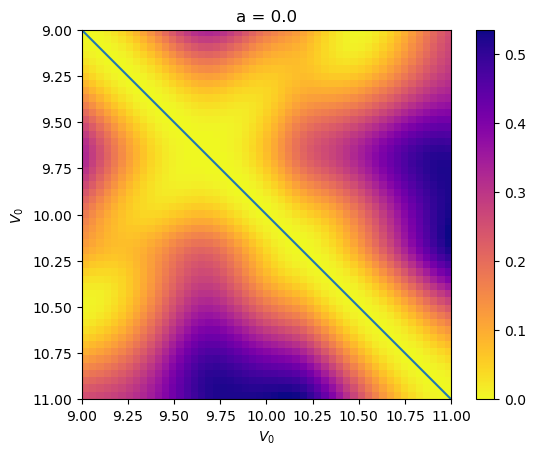

In [8]:
momindices=np.where(AVListIndex[:,0]==50)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(VList[indices_JS[1]], VList[indices_JS[0]])
plt.colorbar()
plt.xlabel("$V_0$");
plt.ylabel("$V_0$");
plt.title("a = "+ str(AList[50]))
plt.savefig("JS_latt.png")

In [ ]:
momindices=np.where(AVListIndex[:,0]==50)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(VList[indices_JS[1]], VList[indices_JS[0]])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel("$V_0$");
plt.ylabel("$V_0$");
plt.title("a = "+ str(AList[50]))
plt.savefig("JS_latt.png")

### Cross-correlation $JSD(a',V')$

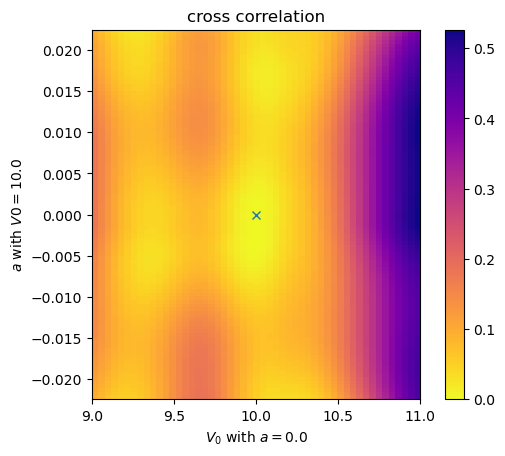

In [9]:
momindices_a=np.where(AVListIndex[:,1]==25)[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==50)[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], acc[-1], acc[0] ], aspect=50)
indices_JS = np.where(JSDivergenceMatrix==0.0)
plt.plot(VList[indices_JS[1]],AList[indices_JS[0]], 'x')
plt.gca().invert_yaxis()
#plt.plot(AList[indices_JS[0]],VList[indices_JS[1]])
plt.xlabel("$V_0$ with $a=$"+str(AList[50]))
plt.ylabel("$a$ with $V0=$"+str(VList[25]))
plt.colorbar()
plt.title("cross correlation")
plt.savefig("JS_cross.png")


In [ ]:
momindices_a=np.where(AVListIndex[:,1]==25)[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==50)[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], acc[-1], acc[0] ], aspect=50)
indices_JS = np.where(JSDivergenceMatrix==0.0)
plt.plot(VList[indices_JS[1]],AList[indices_JS[0]], 'x')
#plt.plot(AList[indices_JS[0]],VList[indices_JS[1]])
plt.gca().invert_yaxis();
plt.xlabel("$V_0$ with $a=$"+str(AList[50]))
plt.ylabel("$a$ with $V0=$"+str(VList[25]))
plt.colorbar()
plt.title("cross correlation")
plt.savefig("JS_cross.png")


In [ ]:
min

## Exploring Dynamic Range

Text(0.5, 1.0, '10.0')

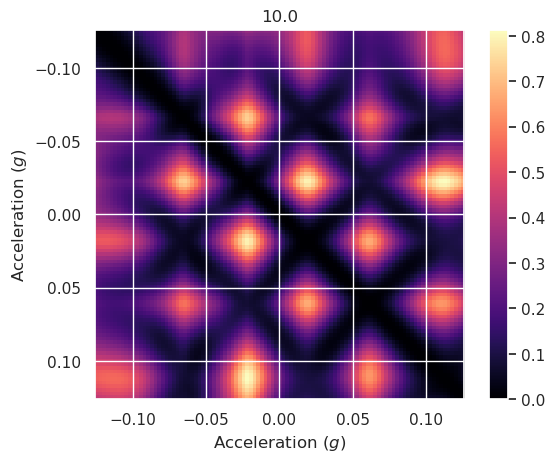

In [20]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])


#JSDivergenceMatrix[JSDivergenceMatrix<0.05]=0;
#JSDivergenceMatrix[JSDivergenceMatrix>0.05]=0.5;

plt.imshow(JSDivergenceMatrix, cmap="magma", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title(VList[25])
#plt.savefig("JS_acc_range.png")


In [ ]:
momindices=np.where(AVListIndex[:,0]==50)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

JSDivergenceMatrix[JSDivergenceMatrix>0.1]=0;
plt.imshow(JSDivergenceMatrix, cmap="magma", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
plt.colorbar()
plt.xlabel("$V_0$");
plt.ylabel("$V_0$");

plt.title("a = "+ str(AList[50]));
plt.savefig("JS_latt_range.png")

In [ ]:
momindices_a=np.where(AVListIndex[:,1]==25)[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==50)[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

JSDivergenceMatrix[JSDivergenceMatrix>0.1]=0;
plt.imshow(JSDivergenceMatrix, cmap="magma", extent=[latt[0], latt[-1], acc[-1], acc[0] ], aspect=50)
plt.xlabel("$V_0$ with $a=$"+str(AList[50]))
plt.ylabel("$a$ with $V0=$"+str(VList[25]))
plt.colorbar()
plt.title("cross correlation")
plt.savefig("JS_cross_range.png")


## Automating Sensitivity Plots (In Progress)

### Bayesian Code

In [ ]:

plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size*VList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0], indexpair[1]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    


### Bayesian Contour

In [ ]:
fig = plt.figure();

sumplotPaV=np.zeros(plotPaV[0].shape);
# fig.suptitle('P(a,V|m) with successive m')


# Hide x labels and tick labels for all but bottom plot.
for i in range(len(plotPaV)):
    temp = np.copy(plotPaV[i]);
    cutoff = np.max(temp)/2;
    temp[abs(temp-cutoff)<=0.001]=1;
    temp[temp!=1]=0;
    sumplotPaV+=temp;
   # axs[i].imshow(plotPaV[i], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);

plt.imshow(sumplotPaV, cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25)
plt.xlabel("$V_0$");
plt.ylabel("$a$")
plt.suptitle("$P(a,V_0 |m)$ for every 10 measurements")

In [ ]:
plotPaV[10].shape
temp = np.copy(plotPaV[10]);
cutoff = np.max(temp)/2;
temp[abs(temp-cutoff)<=0.001]=1;
temp[temp!=1]=0.0;
(X,Y)= np.nonzero(temp);
plt.plot(X, Y, 'x')

In [ ]:
fig = plt.figure();
desired_no_of_plots = len(plotPaV)
epsilon = 0.001;

#ax = fig.add_subplot(projection="3d");
for i in range(4, desired_no_of_plots, 10):
    temp = np.copy(plotPaV[i]);
    cutoff = np.max(temp)/2;

    temp[abs(temp-cutoff)<=epsilon*i/4]=1;
    temp[temp!=1]=0.0;

    (X,Y) = np.nonzero(temp);   
    z = np.ones(len(X))*i;
    #ax.plot(VList[Y], AList[X],z,'x', label = str(i));
    plt.plot(VList[Y], AList[X],'x', label = str(i));
   # axs[i].imshow(plotPaV[i], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);


plt.ylabel("$a$");
plt.xlabel("$V_0$")
plt.legend()
plt.title("$P(a,V_0 |m)$ for every 10 measurements")
plt.show()

In [ ]:
fig = plt.figure();
desired_no_of_plots = 20;
sumplotPaV=np.zeros(plotPaV[0].shape);

for i in range(0, len(plotPaV)):
   temp = np.copy(plotPaV[i]);
   cutoff = np.max(temp)/2;
#   temp[abs(temp-cutoff)<=0.001]=1;
#   temp[temp!=1]=0.0;
   temp[abs(temp-cutoff)>=0.01]=0.0;
   temp[temp!=0.0]=i;
   sumplotPaV+=temp;
   # axs[i].imshow(plotPaV[i], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);

plt.imshow(sumplotPaV, cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25)
plt.colorbar()
plt.ylabel("$a$");
plt.xlabel("$V_0$")
plt.title("$P(a,V_0 |m)$ for every 10 measurements")

In [ ]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[0]]*accUnit/g,AList[indices_JS[1]]*accUnit/g)
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title(VList[25])
